In [3]:
import warnings
warnings.filterwarnings("ignore") #오류를 무시하는 코드

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#사이킷런 라이브러리에 포함된 IRIS 데이터 로드
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11) # 랜덤 시드 설정

# 모델 적용
dt_clf = DecisionTreeClassifier(random_state=156)

#데이터 구성 확인
print("학습 데이터 개수 : " + str(len(X_train)))
print("테스트 데이터 개수 : " + str(len(X_test)))

# 모델 학습
dt_clf.fit(X_train, y_train)

#학습 데이터 검증
pred = dt_clf.predict(X_train)
accuarcy = accuracy_score(y_train, pred)
print("학습 데이터 검증 정확도 : ", accuarcy)

#테스트 데이터 검증
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("테스트 데이터 검증 정확도 : ", accuracy)

학습 데이터 개수 : 120
테스트 데이터 개수 : 30
학습 데이터 검증 정확도 :  1.0
테스트 데이터 검증 정확도 :  0.9333333333333333


In [4]:
feature_imp = dt_clf.feature_importances_

for name, value in zip(iris_data.feature_names, feature_imp):
    print(f"{name} : {value:.4f}")

sepal length (cm) : 0.0250
sepal width (cm) : 0.0000
petal length (cm) : 0.5549
petal width (cm) : 0.4201


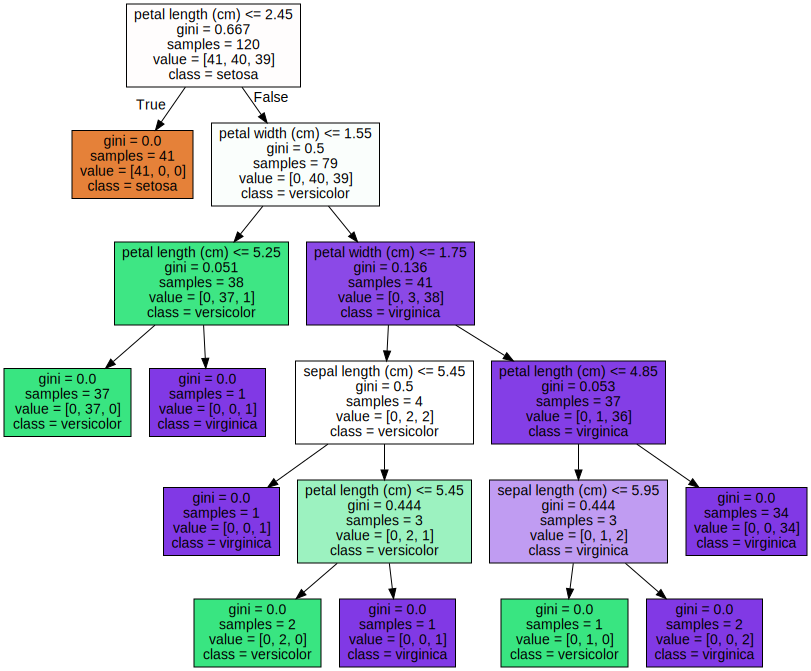

In [5]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file="tree.dot",
                class_names=iris_data.target_names,
                feature_names= iris_data.feature_names,
                impurity = True,
                filled= True)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

학습 데이터 검증 정확도 :  0.9666666666666667
테스트 데이터 검증 정확도 :  0.9333333333333333


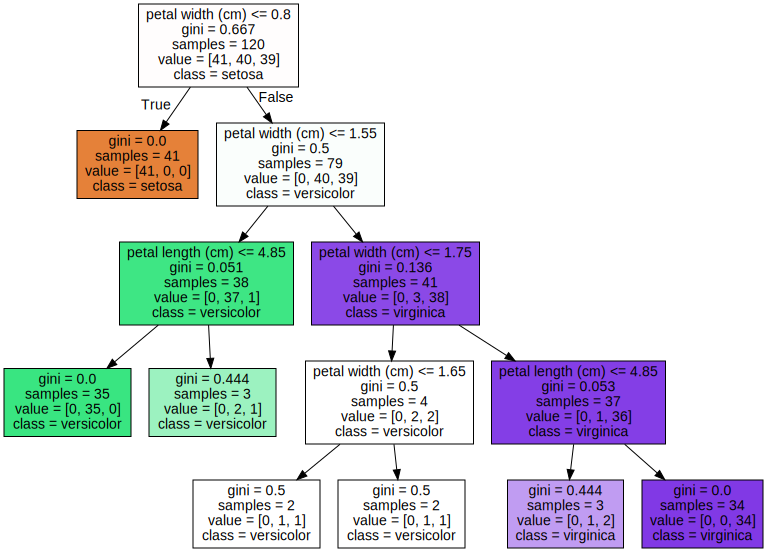

In [7]:
def iris_tree_hyper(max_dep = 4, min_ss = 4, min_sl = 2):
    dt_clf = DecisionTreeClassifier(random_state= 22,
                                    max_depth= max_dep,
                                    min_samples_split= min_ss,
                                    min_samples_leaf= min_sl)
    dt_clf.fit(X_train, y_train)

    export_graphviz(dt_clf, out_file="tree.dot",
                    class_names= iris_data.target_names,
                    feature_names= iris_data.feature_names,
                    impurity= True,
                    filled= True)
    with open("tree.dot") as f:
        dot_graph = f.read()

        pred = dt_clf.predict(X_train)
        accuarcy = accuracy_score(y_train, pred)
        print("학습 데이터 검증 정확도 : ", accuarcy)

        pred = dt_clf.predict(X_test)
        accuarcy = accuracy_score(y_test, pred)
        print("테스트 데이터 검증 정확도 : ", accuracy)
        
        return graphviz.Source(dot_graph)
iris_tree_hyper()

In [13]:
# DecisionTreeClassifier 모듈을 불러옵니다. 의사결정트리 분류 모델을 만드는 데 사용됩니다.
from sklearn.tree import DecisionTreeClassifier
# 사이킷런 내장 데이터인 유방암 진단 데이터를 불러옵니다.
from sklearn.datasets import load_breast_cancer
# 데이터를 학습 데이터와 테스트 데이터로 분리하는 데 사용됩니다.
from sklearn.model_selection import train_test_split
# 모델의 예측 성능을 평가하는 데 사용됩니다.
from sklearn.metrics import accuracy_score

# load_breast_cancer 함수를 이용해 유방암 진단 데이터를 불러와 변수에 저장합니다.
breast_cancer_data = load_breast_cancer()
# train_test_split 함수를 이용해 데이터를 학습 데이터와 테스트 데이터로 분리합니다.
# test_size 인자는 테스트 데이터의 비율을 의미하며, 여기서는 전체 데이터의 20%를 테스트 데이터로 사용합니다.
# random_state 인자는 데이터 분리 시 적용되는 랜덤 시드값을 의미합니다.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.data, 
                                                    breast_cancer_data.target, 
                                                    test_size=0.2, 
                                                    random_state=11) 

# DecisionTreeClassifier 모델을 생성합니다. random_state 인자는 모델 내부의 랜덤성을 제어합니다.
dt_clf = DecisionTreeClassifier(random_state=569)

# 학습 데이터의 개수와 테스트 데이터의 개수를 출력합니다.
print("학습 데이터 개수 : " + str(len(X_train)))
print("테스트 데이터 개수 : " + str(len(X_test)))

# fit 함수를 이용해 모델을 학습 데이터에 맞춰 학습시킵니다.
dt_clf.fit(X_train, y_train)

# predict 함수를 이용해 학습 데이터에 대한 예측값을 생성하고, accuracy_score 함수를 이용해 정확도를 계산합니다.
pred = dt_clf.predict(X_train)
accuarcy = accuracy_score(y_train, pred)
print("학습 데이터 검증 정확도 : ", accuarcy)

# 테스트 데이터에 대한 예측값을 생성하고, 정확도를 계산합니다.
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("테스트 데이터 검증 정확도 : ", accuracy)


학습 데이터 개수 : 455
테스트 데이터 개수 : 114
학습 데이터 검증 정확도 :  1.0
테스트 데이터 검증 정확도 :  0.9385964912280702


: 